In [1]:
# Imports
import json
from pprint import pprint
import glob
import re
import pandas as pd
import seaborn as sns
from scipy import stats
from math import sqrt
from scipy.stats import t
%matplotlib inline

In [2]:
pd.options.display.float_format = '{:,.4f}'.format

In [17]:
class ExperimentResults:
    def __init__(self, id, parameters, results):
        self.id = id
        self.parameters = parameters
        for v in results:
            v.update(parameters)
        self.results = pd.DataFrame(results)

def getAllExperiments():
    experiments = {}
    
    for file in glob.glob("experiment-*.json"):
        fileName = file.split("/")[-1]
        number = int(re.match("experiment-([\d]+).json", fileName).group(1))
        
        with open(file) as f:
            e = json.load(f)
            experiments[number] = ExperimentResults(e["experiment"], e["parameters"], e["results"])

    return experiments

def getExperimentResultsForIds(exps, ids):
    return pd.concat([exps[i].results for i in ids])

def drawBoxPlotForExperiments(expList, x, y):
    ax = sns.boxplot(x=x, y=y, data=expList)

In [18]:
experiments = getAllExperiments()

In [22]:
firstExps = getExperimentResultsForIds(experiments, [1,2,3,4])

# Plot for question 1

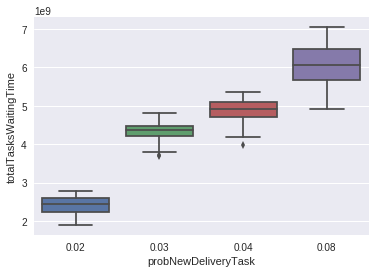

In [23]:
drawBoxPlotForExperiments(firstExps, "probNewDeliveryTask", "totalTasksWaitingTime")

# Plots for question 2

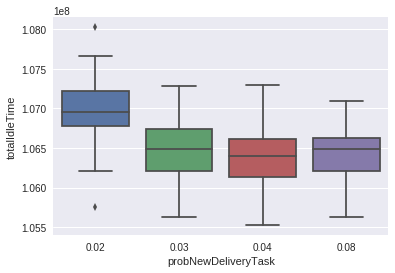

In [24]:
drawBoxPlotForExperiments(firstExps, "probNewDeliveryTask", "totalIdleTime")

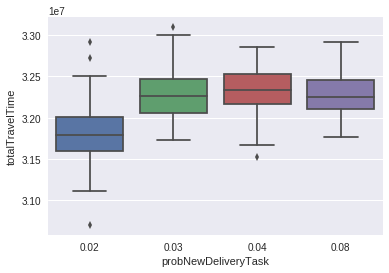

In [25]:
drawBoxPlotForExperiments(firstExps, "probNewDeliveryTask", "totalTravelTime")

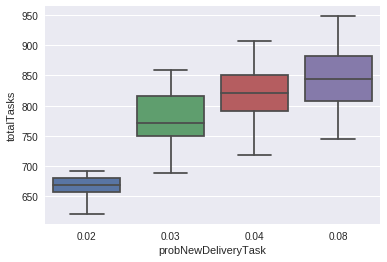

In [26]:
drawBoxPlotForExperiments(firstExps, "probNewDeliveryTask", "totalTasks")

# Question 3

In [27]:
secondExps = getExperimentResultsForIds(experiments, [5,6,7,8])

# Plots for question 3

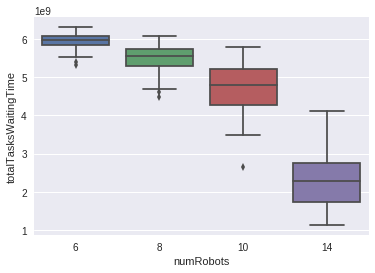

In [30]:
drawBoxPlotForExperiments(secondExps, "numRobots", "totalTasksWaitingTime")

# t-tests

In [51]:
def perform_t_test(first, second, keyValue):
    n1 = first.shape[0]
    n2 = second.shape[0]
    
    # calculate degrees of freedom
    df = n1 + n2 - 2
    
    equalVar = stats.levene(first[keyValue],second[keyValue])[1] > 0.05
    
    ind_t_test = stats.ttest_ind(first[keyValue], second[keyValue], equal_var=equalVar)

    std1 = first[keyValue].std()
    std2 = second[keyValue].std()

    std_n1n2 = sqrt( ((n1 - 1)*(std1)**2 + (n2 - 1)*(std2)**2) / df) 
    
    diff_mean = first[keyValue].mean() - second[keyValue].mean()
    MoE = t.ppf(0.975, df) * std_n1n2 * sqrt(1/n1 + 1/n2)
    print('The results of the independent t-test are: \n\tt-value = {:4.3f}\n\tp-value = {:4.3f}'.format(ind_t_test[0],ind_t_test[1]))
    print ('The difference between groups is {:3.1f} [{:3.1f} to {:3.1f}] (mean [95% CI])'.format(diff_mean, diff_mean - MoE, diff_mean + MoE))   
    
def perform_t_test_range(start, end, experiments, key):   
    for i in range(start, end+1):
        for j in range(i+1, end+1):
            print("{} vs. {}".format(i, j))
            perform_t_test(experiments[i].results, experiments[j].results, key)
            print()

##### Increasing probability of requests, amount of tasks

In [54]:
perform_t_test_range(1, 4, experiments, "totalTasks")

1 vs. 2
The results of the independent t-test are: 
	t-value = -24.397
	p-value = 0.000
The difference between groups is -110.8 [-119.7 to -101.8] (mean [95% CI])

1 vs. 3
The results of the independent t-test are: 
	t-value = -34.033
	p-value = 0.000
The difference between groups is -152.2 [-161.0 to -143.4] (mean [95% CI])

1 vs. 4
The results of the independent t-test are: 
	t-value = -35.113
	p-value = 0.000
The difference between groups is -177.6 [-187.6 to -167.6] (mean [95% CI])

2 vs. 3
The results of the independent t-test are: 
	t-value = -6.877
	p-value = 0.000
The difference between groups is -41.4 [-53.3 to -29.6] (mean [95% CI])

2 vs. 4
The results of the independent t-test are: 
	t-value = -10.328
	p-value = 0.000
The difference between groups is -66.9 [-79.6 to -54.1] (mean [95% CI])

3 vs. 4
The results of the independent t-test are: 
	t-value = -3.954
	p-value = 0.000
The difference between groups is -25.4 [-38.1 to -12.7] (mean [95% CI])



##### Increasing probability of requests, idle time

In [52]:
perform_t_test_range(1, 4, experiments, "totalIdleTime")

1 vs. 2
The results of the independent t-test are: 
	t-value = 10.756
	p-value = 0.000
The difference between groups is 535980.0 [437711.7 to 634248.3] (mean [95% CI])

1 vs. 3
The results of the independent t-test are: 
	t-value = 11.442
	p-value = 0.000
The difference between groups is 591290.0 [489386.2 to 693193.8] (mean [95% CI])

1 vs. 4
The results of the independent t-test are: 
	t-value = 11.953
	p-value = 0.000
The difference between groups is 560020.0 [467630.8 to 652409.2] (mean [95% CI])

2 vs. 3
The results of the independent t-test are: 
	t-value = 1.101
	p-value = 0.272
The difference between groups is 55310.0 [-43737.6 to 154357.6] (mean [95% CI])

2 vs. 4
The results of the independent t-test are: 
	t-value = 0.531
	p-value = 0.596
The difference between groups is 24040.0 [-65189.0 to 113269.0] (mean [95% CI])

3 vs. 4
The results of the independent t-test are: 
	t-value = -0.662
	p-value = 0.509
The difference between groups is -31270.0 [-124487.7 to 61947.7] (mean [

##### Increasing probability of requests, tavel time

In [53]:
perform_t_test_range(1, 4, experiments, "totalTravelTime")

1 vs. 2
The results of the independent t-test are: 
	t-value = -10.583
	p-value = 0.000
The difference between groups is -496590.0 [-589125.6 to -404054.4] (mean [95% CI])

1 vs. 3
The results of the independent t-test are: 
	t-value = -11.365
	p-value = 0.000
The difference between groups is -520940.0 [-611334.6 to -430545.4] (mean [95% CI])

1 vs. 4
The results of the independent t-test are: 
	t-value = -11.304
	p-value = 0.000
The difference between groups is -498790.0 [-585803.0 to -411777.0] (mean [95% CI])

2 vs. 3
The results of the independent t-test are: 
	t-value = -0.590
	p-value = 0.556
The difference between groups is -24350.0 [-105736.9 to 57036.9] (mean [95% CI])

2 vs. 4
The results of the independent t-test are: 
	t-value = -0.056
	p-value = 0.955
The difference between groups is -2200.0 [-79813.9 to 75413.9] (mean [95% CI])

3 vs. 4
The results of the independent t-test are: 
	t-value = 0.582
	p-value = 0.561
The difference between groups is 22150.0 [-52898.4 to 97198

##### Increasing amount of robots when many requests, totalTasksWaitingTime

In [46]:
perform_t_test_range(5, 8, experiments, "totalTravelTime")
for i in range(5, 9):
    for j in range(i+1, 9):
        print("{} vs. {}".format(i, j))
        performT(experiments[i].results, experiments[j].results, "totalTasksWaitingTime")
        print()

5 vs. 6
The results of the independent t-test are: 
	t-value = 12.150
	p-value = 0.000
The difference between groups is 476161826.8 [398879780.0 to 553443873.5] (mean [95% CI])

5 vs. 7
The results of the independent t-test are: 
	t-value = 19.591
	p-value = 0.000
The difference between groups is 1261134768.4 [1134189803.4 to 1388079733.3] (mean [95% CI])

5 vs. 8
The results of the independent t-test are: 
	t-value = 49.153
	p-value = 0.000
The difference between groups is 3607178142.5 [3462458286.2 to 3751897998.9] (mean [95% CI])

6 vs. 7
The results of the independent t-test are: 
	t-value = 11.090
	p-value = 0.000
The difference between groups is 784972941.6 [645394267.8 to 924551615.3] (mean [95% CI])

6 vs. 8
The results of the independent t-test are: 
	t-value = 39.600
	p-value = 0.000
The difference between groups is 3131016315.8 [2975096404.1 to 3286936227.4] (mean [95% CI])

7 vs. 8
The results of the independent t-test are: 
	t-value = 24.925
	p-value = 0.000
The difference